In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
%cd drive/MyDrive/DatasetJeruk/

[Errno 2] No such file or directory: 'drive/MyDrive/DatasetJeruk/'
/content/drive/MyDrive/DatasetJeruk


In [271]:
%ls

Prediksi/  Testing/  Training/


IMPORT LIBRARY

In [234]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MEMBACA ISI FOLDER TRAINING

In [235]:
import os
for dirname, _, filenames in os.walk('Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.02.33 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.01.36 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.00.02 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.01.58 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.01.10 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.00.06 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.59.19 PM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.59.33 PM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.01.49 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.59.48 PM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.59.54 PM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.00.17 AM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.58.56 PM.png
Training/Matang/rotated_by_15_Screen Shot 2018-06-13 at 12.01.23

MENGIDENTIFIKASI DAN MENGHITUNG KELAS DAN ISI YANG ADA DI FOLDER TRAINING

In [236]:
data_path='Training'

class_name=sorted(os.listdir(data_path))
class_name

['Matang', 'Mentah']

In [237]:
n_classes = len(class_name)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [238]:
class_dis = [len(os.listdir(os.path.join(data_path, name))) for name in class_name]
class_dis

[150, 150]

In [241]:
training_data = 'Training'
testing_data = 'Testing'

AUGMENTASI DATASET MENGGUNAKAN IMAGEDATAGENERATOR 

In [272]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory= training_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
        training_data,
        target_size=(224, 224),
        class_mode="categorical",
        subset="validation"
)


test_generator = test_datagen.flow_from_directory(
    directory= testing_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


PEMBUATAN MODEL

In [273]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224, 224, 3 )))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 2, activation='softmax'))

In [274]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_54 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_56 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                

KOMPILASI DAN PELATIHAN MODEL

In [275]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [276]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    batch_size= 32,
    shuffle=True)

Epoch 1/15
8/8 [==============================] - 44s 2s/step - loss: 0.6956 - accuracy: 0.5208 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 0.6948 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.8604 - accuracy: 0.4500 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.6953 - accuracy: 0.4917 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 11s 1s/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 8/15
8/8 [==================

PREDIKSI DAN VISUALISASI HASIL PREDIKSI

In [262]:
predict_data = "Prediksi/"
predict_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    predict_data,
    target_size=(224, 224),
    class_mode="categorical",
)

Found 6 images belonging to 2 classes.


In [283]:
class_nameP = ["Mentah", "Matang"]

In [284]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


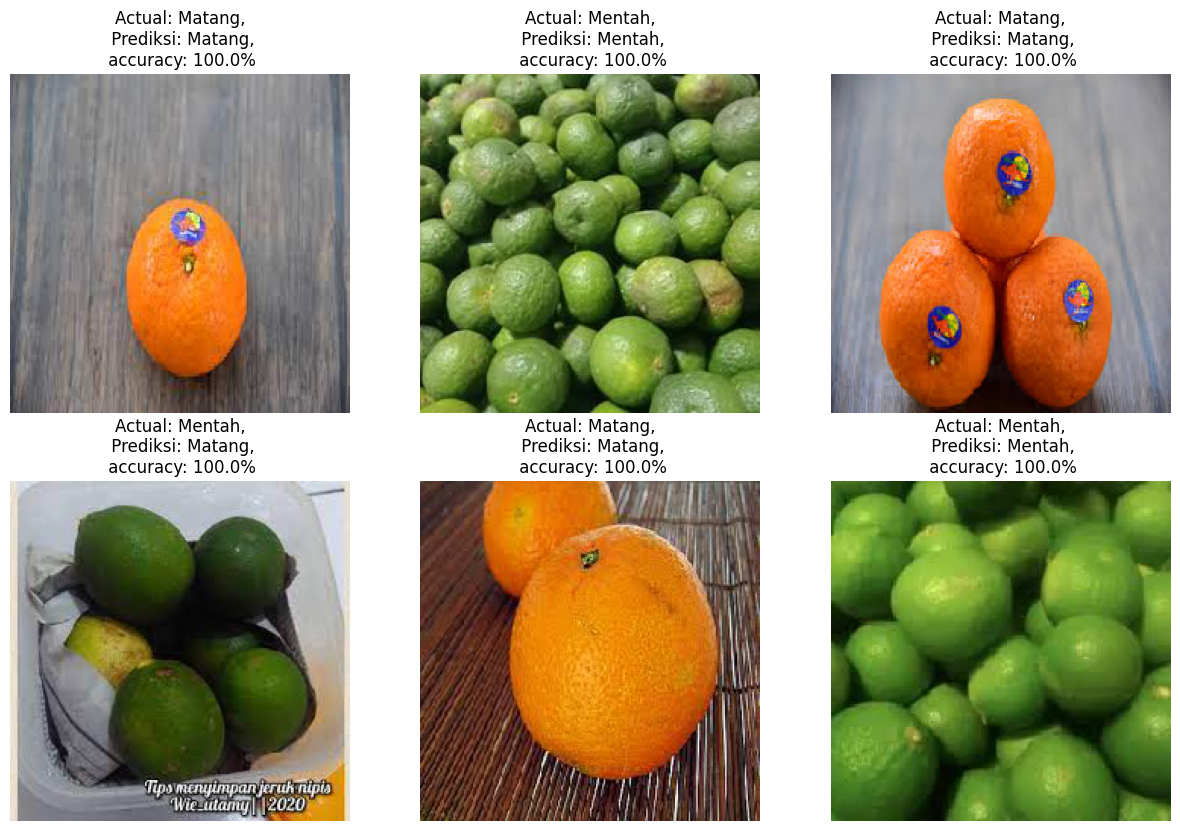

In [289]:
plt.figure(figsize=(15, 15))

for images, labels in predict_gen:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_nameP[int(labels[i][0])] 
        plt.title(f"Actual: {actual_class},\n Prediksi: {predicted_class},\n accuracy: {confidence}%")
        plt.axis("off")
    break